# Linear Regression

This notebook goes over a basic linear regression implementation via gradient descent.

After implementing by hand, some built in R benchmarks are compared, and we start to dig into some of the metrics used in regression.

In [1]:
# Useful libraries?
library(repr)
library(ggplot2) 
library(reshape2)
library(GGally)
library(broom)

---
---
---
# Problem 1 - Optimization
---
***
___

In [2]:
# Import the advertising dataset
dat_adv <- read.csv("../Data/Advertising.csv", header = TRUE)
dat_adv = dat_adv[c('TV','Radio','Newspaper','Sales')]

In [693]:
# Take a look and pull out useful numbers
# We have TV, Radio, Newspaper as inputs, Sales as our output
# Note that the numbers are all rather large -> might want to scale
tv <- 'TV'
radio <- 'Radio'
news <- 'Newspaper'
sales <- 'Sales'

n = nrow(dat_adv)   # Number of examples
p = ncol(dat_adv)-1 # Number of parameters, -2: 1 for X and one for Sales
head(dat_adv)

TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


In [368]:
# Let's create usable matrices to perform gradient descent

# Design Matrix
X <- as.matrix(subset(dat_adv, select=c(tv,radio,news)))
# We might need to normalize
Xscaled = scale(X, center = TRUE, scale = TRUE)

# Add a bias column
X <- cbind("bias"=rep(1,n),X)
Xscaled <- cbind("bias"=rep(1,n),Xscaled)

# Output variable of interest
y <- as.matrix(subset(dat_adv, select=c(sales)))

In [369]:
# Create functions to calculate the gradient and the negative log likelihood (normalizing to 1/n)

negative_loglikelihood = function(X,y,beta){
    J = mean((y - X %*% beta)^2)
    return(J)
}
    

gradient = function(X,y,beta){
    n = dim(y)[1]
    dbeta = -(t(X) %*% y - t(X) %*% X %*% beta)/n
    return(dbeta)
}

In [370]:
# Gradient Descent
# Include a plot to show whether its converged or not by max_iter

gradDesc = function(betaInit,X,y,max_iter,learning_rate){
    beta = betaInit
    cost_vec = 1:max_iter
    
    for (ii in 1:max_iter){
        # Calculate the gradient
        dbeta = gradient(X,y,beta)

        # Update theta
        beta = beta - learning_rate * dbeta
        
        # Update the cost list
        J = negative_loglikelihood(X,y,beta)
        cost_vec[ii] = J
        
    }
    
    options(repr.plot.width=4, repr.plot.height=3)
    par(mar=c(4.2, 3.8, 0.2, 0.2))
    plot(cost_vec,type="l",log = "xy",xlab="Epoch",ylab="NLL")
    
    return(beta)
}

,Sales
bias,0.01562410
TV,0.05376577
Radio,0.22151358
Newspaper,0.01702390


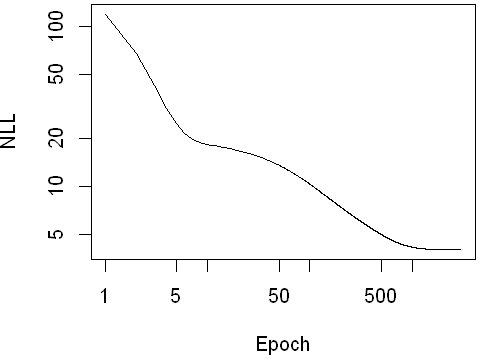

In [883]:
# Initialize Hyperparameters
lr = 1e-5
max_iter = 3000

# Initialize Initial Guess
bInit <- runif(p+1)
bInit = c(0,0,0,0)

# Good guess based on linear model fit
#bInit = c(3,0,0,0)

# Perform gradient descent to get the guesses for beta
beta = gradDesc(bInit,X,y,max_iter,lr)
beta

,Sales
bias,14.02250000
TV,3.92908869
Radio,2.79906919
Newspaper,-0.02259517


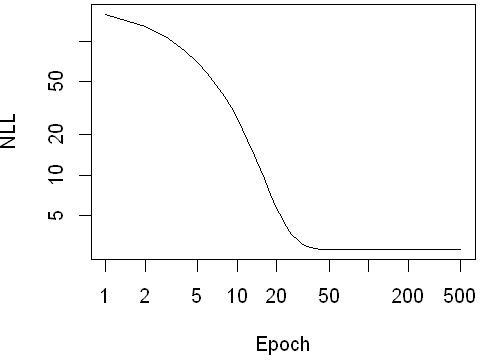

In [882]:
# Do it again, but with the scaled data (converges much faster)
lr = 1e-1
max_iter = 500


betaScaled = gradDesc(bInit,Xscaled,y,max_iter,lr)
betaScaled

In [887]:
# Compare with the built in R tool lm
fit = lm(Sales~TV+Radio+Newspaper)
glance(fit)
tidy(fit)
betalm = fit$coefficients
betalm

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8972106,0.8956373,1.68551,570.2707,1.575227e-96,4,-386.1811,782.3622,798.8538,556.8253,196


term,estimate,std.error,statistic,p.value
(Intercept),2.938889369,0.311908236,9.4222884,1.267295e-17
TV,0.045764645,0.001394897,32.8086244,1.509960e-81
Radio,0.188530017,0.008611234,21.8934961,1.505339e-54
Newspaper,-0.001037493,0.005871010,-0.1767146,8.599151e-01


(Intercept)           TV        Radio    Newspaper 
 2.938889369  0.045764645  0.188530017 -0.001037493

In [802]:
# Compare with standard linear regression (analytic solution)
betaOLS = solve(t(X) %*% X) %*% t(X) %*% y
betaOLS

,Sales
bias,2.938889369
TV,0.045764645
Radio,0.188530017
Newspaper,-0.001037493


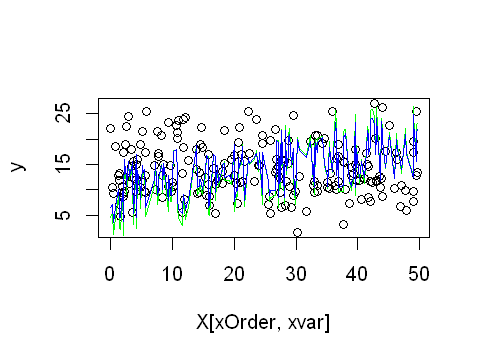

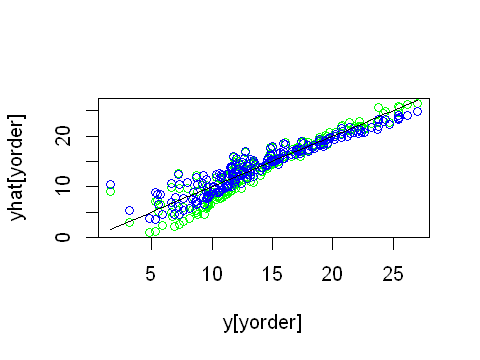

In [889]:
# This shows the y solution against one variable
# Can be changed to different variables, or change the regression above to 1D if you want a straight line
xvar = radio
xOrder = order(X[,xvar])
yhat = X%*%beta
yhatlm = X%*%betalm
yhatOLS = X%*%betaOLS
plot(X[xOrder,xvar],y)
lines(X[xOrder,xvar],yhat[xOrder],col='green')
lines(X[xOrder,xvar],yhatlm[xOrder],col='red')
lines(X[xOrder,xvar],yhatOLS[xOrder],col='blue')

yorder = order(y)
plot(y[yorder],yhat[yorder],col='green')
points(y[yorder],yhatlm[yorder],col='red')
points(y[yorder],yhatOLS[yorder],col='blue')
lines(y[yorder],y[yorder])

In [890]:
# Compare all the final coefficients (too much effort to format..)
# It looks like Gradient Descent minimized to different places (if I force the bInit to the LM starting point, can probably get closer)
print('Gradient Descent')
beta
print('r lm method')
betalm
print('OLS Analytic')
betaOLS

[1] "Gradient Descent"


,Sales
bias,0.01562410
TV,0.05376577
Radio,0.22151358
Newspaper,0.01702390


[1] "r lm method"


(Intercept)           TV        Radio    Newspaper 
 2.938889369  0.045764645  0.188530017 -0.001037493

[1] "OLS Analytic"


,Sales
bias,2.938889369
TV,0.045764645
Radio,0.188530017
Newspaper,-0.001037493


## Discussion

The gradient descent method does find a local minima, but it does not appear to find the global minima that you would arrive at via the normal equation. If I change my initial conditions it is possible for GD to converge on a similiar answer to SLM.

---
---
---
# Problem 2 - Interpretation
---
---
---

---
## Single Variable Regression

In [558]:
# Okay, let's dig into this a little bit. But sticking to lm as it gives us nice fancy statistics :)
# First, let's consider just the sales ~ newspaper relationship
fitNews = lm(Sales~Newspaper,data=dat_adv)
names(fitNews)

tidy(fitNews)
glance(fitNews)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

term,estimate,std.error,statistic,p.value
(Intercept),12.3514071,0.62142019,19.876096,4.713507e-49
Newspaper,0.0546931,0.01657572,3.299591,1.148196e-03


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.05212045,0.04733317,5.09248,10.8873,0.001148196,2,-608.3357,1222.671,1232.566,5134.805,198


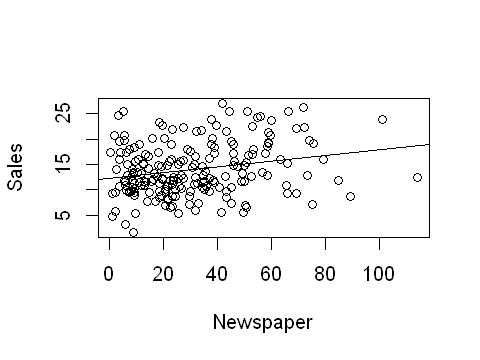

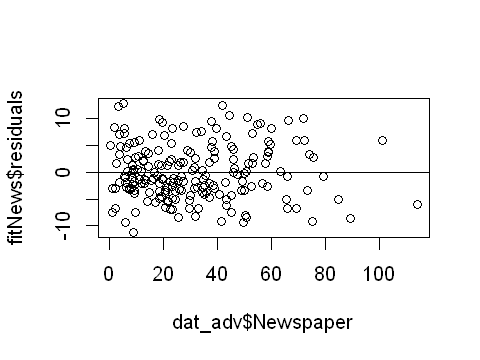

In [533]:
# Plot it and its residuals
plot(Sales ~ Newspaper, data = dat_adv)
abline(fitNews)

plot(dat_adv$Newspaper,fitNews$residuals)
abline(0,0)

#plot(fitNews)

In [525]:
# Before moving on, get confidence intervals
confint(fitNews)

# As well as confidence/prediction intervals for specific values
# (confidence = many data sets, predict = 1 data set)
newsMean=mean(dat_adv$Newspaper)
newdata = data.frame(Newspaper=newsMean)
predict(fitNews,newdata,interval="confidence")
predict(fitNews,newdata,interval="predict")

,2.5 %,97.5 %
(Intercept),11.12595560,13.57685854
Newspaper,0.02200549,0.08738071


,fit,lwr,upr
1,14.0225,13.31239,14.73261


,fit,lwr,upr
1,14.0225,3.954965,24.09004


## Discussion: Simple Linear Regression

1. There does not appear to be a significant relationship between Newspaper and Sales: there is a spread about the line, and the R^2 statistic is very low.

    However, the p-value is very small, so it seems likely to reject the null (only 0.1% chance that this data can be explained by the null hypothesis). There is also no discernible pattern to worry about in the residuals. 

---
## Multivariate Regression

In [557]:
# Next, we do a multiple regression on all 3 variables
fitAll = lm(Sales~TV+Radio+Newspaper,data=dat_adv)

tidy(fitAll)
glance(fitAll)

term,estimate,std.error,statistic,p.value
(Intercept),2.938889369,0.311908236,9.4222884,1.267295e-17
TV,0.045764645,0.001394897,32.8086244,1.509960e-81
Radio,0.188530017,0.008611234,21.8934961,1.505339e-54
Newspaper,-0.001037493,0.005871010,-0.1767146,8.599151e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8972106,0.8956373,1.68551,570.2707,1.575227e-96,4,-386.1811,782.3622,798.8538,556.8253,196


,TV,Radio,Newspaper,Sales
TV,1,0.0548086644658301,0.056647874965057,0.782224424861606
Radio,,1,0.354103750761175,0.576222574571055
Newspaper,,,1,0.228299026376165
Sales,,,,1


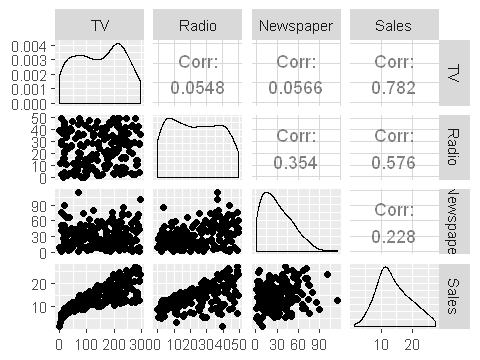

In [507]:
# Let's also get some extra data about the relationships between parameters

# correlation matrix
corrs=cor(dat_adv)
corrs[lower.tri(corrs)]<- ""

corrs
ggpairs(dat_adv)

## Discussion: Multiple Linear Regression

2. Now that we have added the other variables, the p-value for Newspaper has increased to 86%. So it seems unlikely that this parameter is actually a good predictor after all. 

3. This *does* make sense, as we can see there is a reasonable correlation between radio and newspaper, and so the earlier simple linear regression was picking up the radio/sales relationship, essentially by accident. 

---
---
---
# Problem 3 - Assumptions and Diagnostics
---
---
---

## Discussion: Assumptions

1. Typically, we assume that the errors are **iid** (identical, independently distributed). Trends in residuals can point to this being false (ie. errors are heteroscedastic?).

    We also assume that they are uncorrelated, which may not always be the case.(eg. time series data)
    
    If the errors are well behaved then so should be the residuals (no patterns).
    
    Funnel shapes can indicate heteroscedasticity.
    
    QQ Plots can also tell us about the errors: normally distributed data would follow a straight line. Deviations from the line imply the errors are not all the same.

[1] "ALL"


term,estimate,std.error,statistic,p.value
(Intercept),2.938889369,0.311908236,9.4222884,1.267295e-17
TV,0.045764645,0.001394897,32.8086244,1.509960e-81
Radio,0.188530017,0.008611234,21.8934961,1.505339e-54
Newspaper,-0.001037493,0.005871010,-0.1767146,8.599151e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8972106,0.8956373,1.68551,570.2707,1.575227e-96,4,-386.1811,782.3622,798.8538,556.8253,196


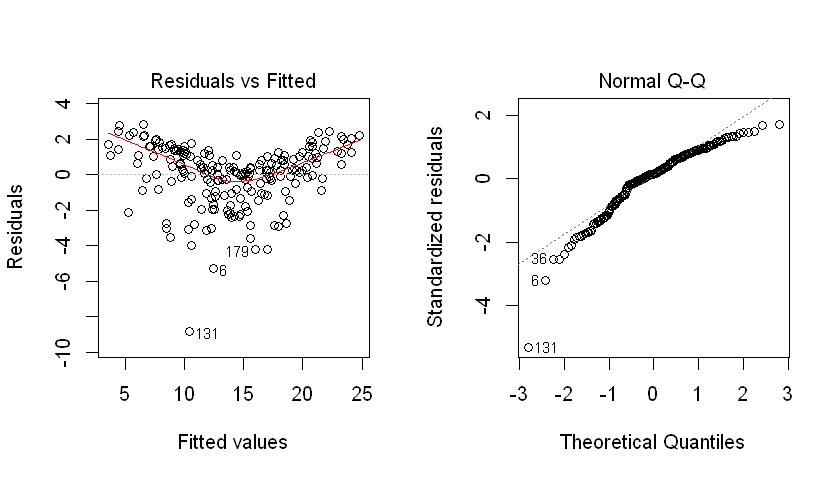

In [764]:
# Let's make a few different models and see how they compare
# Using x1:x2 adds only the iteraction
# Using x1*x2 adds x1+x2+x1:x2 (easy to obey the hierarchy principle this way)
# Using poly(x1,d) adds polynomials up to d
options(repr.plot.width=7, repr.plot.height=4)

# all variables
fit1N = "ALL"
fit1 = lm(Sales~TV+Radio+Newspaper,data=dat_adv)
print(fit1N)
tidy(fit1)
glance(fit1)
par(mfrow=c(1,2))
plot(fit1,which=1:2)

[1] "TV and Radio"


term,estimate,std.error,statistic,p.value
(Intercept),2.92109991,0.294489678,9.919193,4.565557e-19
TV,0.04575482,0.001390356,32.908708,5.436980e-82
Radio,0.18799423,0.008039973,23.382446,9.776972e-59


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8971943,0.8961505,1.681361,859.6177,4.827362e-98,3,-386.197,780.3941,793.5874,556.914,197


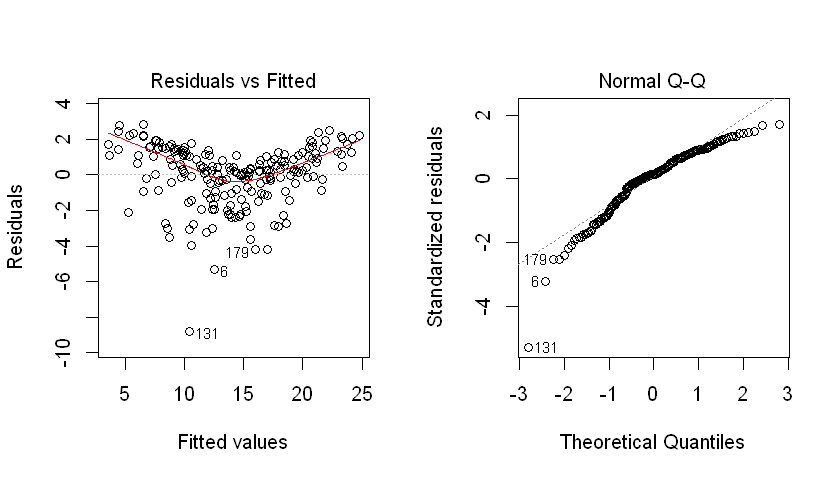

In [763]:
# tv and radio
fit2N = 'TV and Radio'
fit2 = lm(Sales~TV+Radio,data=dat_adv)
print(fit2N)
tidy(fit2)
glance(fit2)
par(mfrow=c(1,2))
plot(fit2,which=1:2)

[1] "TV+Radio*News"


term,estimate,std.error,statistic,p.value
(Intercept),3.1466791146,0.437486093,7.1926380,1.329485e-11
TV,0.0458206682,0.001399261,32.7463229,3.460610e-81
Radio,0.1801233939,0.015098112,11.9301936,5.418153e-25
Newspaper,-0.0093828247,0.013635515,-0.6881167,4.921971e-01
Radio:Newspaper,0.0002843678,0.000419225,0.6783180,4.983743e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8974526,0.8953491,1.687837,426.6399,3.251642e-95,5,-385.9454,783.8909,803.6808,555.5145,195


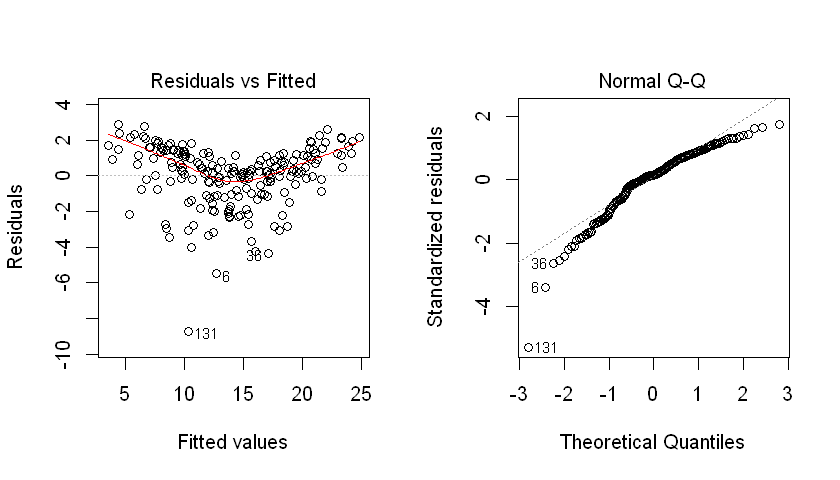

In [765]:
# interaction between radio and newspaper
fit3N = "TV+Radio*News"
fit3 = lm(Sales~TV+Radio*Newspaper,data=dat_adv)
print(fit3N)
tidy(fit3)
glance(fit3)
par(mfrow=c(1,2))
plot(fit3,which=1:2)

[1] "TV*Radio*Newspaper"


term,estimate,std.error,statistic,p.value
(Intercept),6.555887e+00,4.655340e-01,14.08251124,2.115629e-31
TV,1.971030e-02,2.718753e-03,7.24975532,9.950844e-12
Radio,1.962160e-02,1.639134e-02,1.19707096,2.327548e-01
Newspaper,1.310565e-02,1.721126e-02,0.76145801,4.473178e-01
TV:Radio,1.161523e-03,9.753370e-05,11.90893563,7.621102e-25
TV:Newspaper,-5.545501e-05,9.325979e-05,-0.59462937,5.527913e-01
Radio:Newspaper,9.062944e-06,4.831050e-04,0.01875978,9.850522e-01
TV:Radio:Newspaper,-7.609955e-07,2.700343e-06,-0.28181444,7.783893e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9686441,0.9675009,0.9405774,847.3207,1.164514e-140,8,-267.4533,552.9065,582.5914,169.8597,192


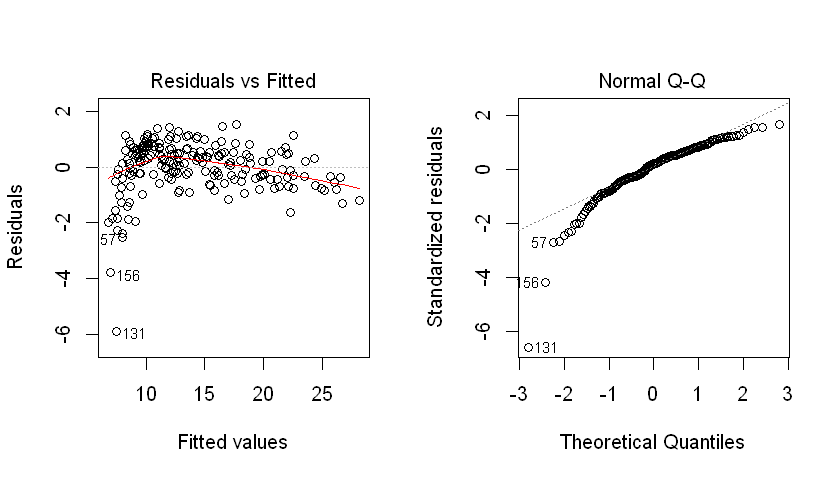

In [664]:
# All 3 multiplied
fit4N = "TV*Radio*Newspaper"
fit4 = lm(Sales~TV*Radio*Newspaper,data=dat_adv)
print(fit4N)
tidy(fit4)
glance(fit4)
par(mfrow=c(1,2))
plot(fit4,which=1:2)

[1] "TV^2"


term,estimate,std.error,statistic,p.value
(Intercept),6.114120e+00,0.6592224346,9.274745,3.226267e-17
TV,6.726593e-02,0.0105944044,6.349194,1.461837e-09
I(TV^2),-6.846934e-05,0.0000355783,-1.924469,5.573659e-02


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.6190371,0.6151695,3.236634,160.0554,5.211257e-42,3,-517.1831,1042.366,1055.56,2063.733,197


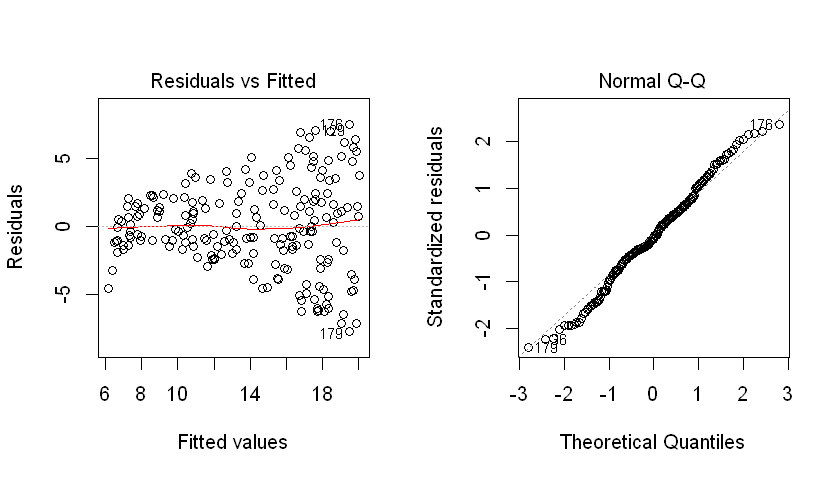

In [873]:
# Square TV
fit5N = "TV^2"
fit5 = lm(Sales~TV+I(TV^2),data=dat_adv)
print(fit5N)
tidy(fit5)
glance(fit5)
par(mfrow=c(1,2))
plot(fit5,which=1:2)

[1] "TV^2+Radio^2+Radio*TV"


term,estimate,std.error,statistic,p.value
(Intercept),5.1944418669,2.061142e-01,25.201772,4.217878e-63
Radio,0.0265400299,1.242355e-02,2.136267,3.391075e-02
TV,0.0509930683,2.236458e-03,22.800818,8.725651e-57
I(TV^2),-0.0001098163,6.900751e-06,-15.913669,4.933640e-37
I(Radio^2),0.0001860761,2.358729e-04,0.788883,4.311434e-01
Radio:TV,0.0010746208,3.478588e-05,30.892445,7.709541e-77


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9860391,0.9856793,0.6243688,2740.391,8.173208e-178,6,-186.539,387.078,410.1662,75.62827,194


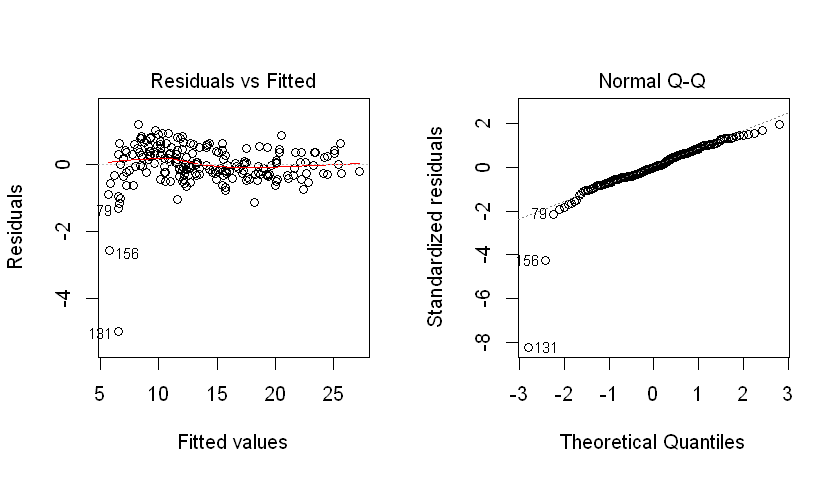

In [872]:
# Square TV, Square Radio, Radio*TV
fit6N = "TV^2+Radio^2+Radio*TV"
fit6 = lm(Sales~Radio*TV+I(TV^2)+I(Radio^2),data=dat_adv)
print(fit6N)
tidy(fit6)
glance(fit6)
par(mfrow=c(1,2))
plot(fit6,which=1:2)

[1] "poly(TV,4)"


term,estimate,std.error,statistic,p.value
(Intercept),14.022500,0.2288355,61.2776385,2.387537e-129
"poly(TV, 4)1",57.572721,3.2362229,17.7900974,1.062213e-42
"poly(TV, 4)2",-6.228802,3.2362229,-1.9247136,5.572057e-02
"poly(TV, 4)3",4.007430,3.2362229,1.2383047,2.170918e-01
"poly(TV, 4)4",-2.326171,3.2362229,-0.7187921,4.731295e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.6230006,0.6152672,3.236223,80.56054,3.046514e-40,5,-516.1373,1044.275,1064.065,2042.262,195


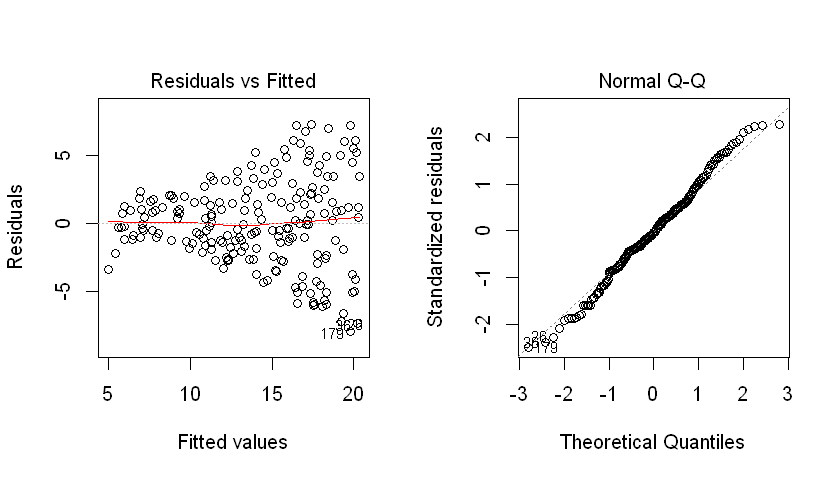

In [871]:
# Polynomial in TV
fit7N = "poly(TV,4)"
fit7 = lm(Sales~poly(TV,4),data=dat_adv)
print(fit7N)
tidy(fit7)
glance(fit7)
par(mfrow=c(1,2))
plot(fit7,which=1:2)

[1] "All Interactions up to order 3"


term,estimate,std.error,statistic,p.value
(Intercept),4.863560e+00,3.253977e-01,14.9465102,7.456930e-34
TV,5.338048e-02,2.832081e-03,18.8485024,2.792805e-45
Radio,2.735401e-02,1.405710e-02,1.9459220,5.314702e-02
Newspaper,1.560768e-02,1.181008e-02,1.3215558,1.879136e-01
I(TV^2),-1.104618e-04,6.993903e-06,-15.7940154,2.228453e-36
I(Radio^2),1.620717e-04,2.494130e-04,0.6498126,5.166023e-01
I(Newspaper^2),3.104435e-05,7.584264e-05,0.4093258,6.827641e-01
TV:Radio,1.050778e-03,6.638476e-05,15.8286038,1.759330e-36
TV:Newspaper,-1.053693e-04,6.431131e-05,-1.6384264,1.029964e-01
Radio:Newspaper,-2.297447e-04,3.553318e-04,-0.6465638,5.186987e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.986577,0.9858668,0.620268,1389.13,4.220256e-171,11,-182.6099,389.2199,428.7997,72.71442,189


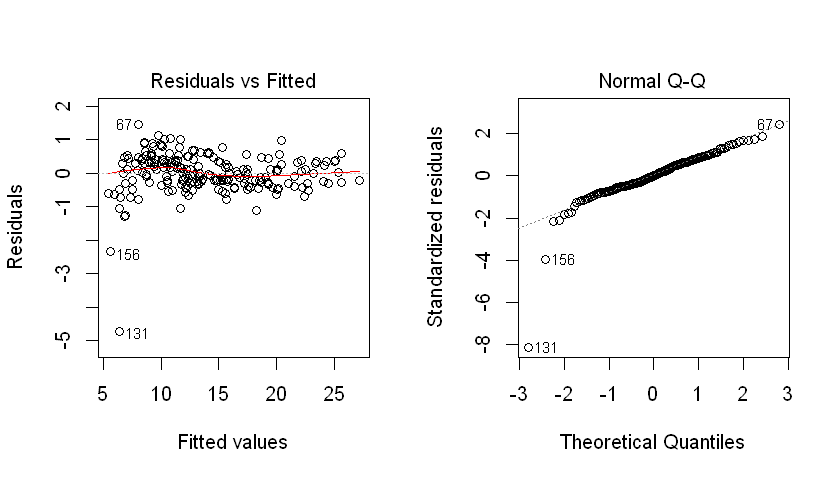

In [874]:
# All up to order 3
fit8N = "All Interactions up to order 3"
fit8 = lm(Sales~.^3+I(TV^2)+I(Radio^2)+I(Newspaper^2),data=dat_adv)
print(fit8N)
tidy(fit8)
glance(fit8)
par(mfrow=c(1,2))
plot(fit8,which=1:2)

[1] "Log TV"


term,estimate,std.error,statistic,p.value
(Intercept),-4.202588,1.1622529,-3.615898,3.797320e-04
log(TV),3.900875,0.2432267,16.038021,1.206373e-37


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.5650437,0.5628469,3.449655,257.2181,1.206373e-37,2,-530.4375,1066.875,1076.77,2356.223,198


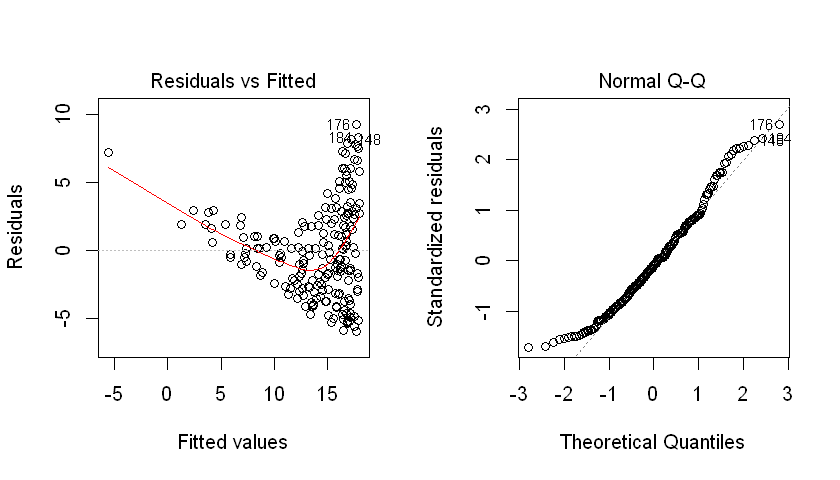

In [878]:
# Log TV
fit9N = "Log TV"
fit9 = lm(Sales~log(TV),data=dat_adv)
print(fit9N)
tidy(fit9)
glance(fit9)
par(mfrow=c(1,2))
plot(fit9,which=1:2)

---
---
---
# Problem 4
---
---
---

# Discussion: Weighted Least Squares (Analytic)

We start with the model
$$y = Xb + \epsilon$$
$$\epsilon \sim \mathcal{N} \left(\mathbf{\mu}, diag(\sigma_1^2,\sigma_2^2,...,\sigma_n^2) \right)$$


We can write out a weight matrix:
$$W = diag(w_1,w_2,...,w_n)$$
$$w_i = \frac{1}{\sigma_i^2}$$

To get the weighted residual sum of squares:
$$ WRRS = \frac{1}{n}(y-Xb)^T W (y-Xb) $$

Which we can minimze and get new estimators for the data (note that I will use $J=WRSS$ for ease of notation):

$$ J = \sum_{i,j}(y_i-b_k X^T_{ki} ) W_{ij} (y_j - X_{jl}b_l) $$

$$ \frac{\partial J}{\partial b_m } = \sum_{i,j} 
-X^T_{mi} W_{ij} y_j - X_{mi}^T W_{ij} X_{jl} b_l + y_iW_{ij}X_{jm} - b_kX^T_{ki}W_{ij} X_{jm} = 0 $$

$$ \sum_{ij} \left(X^T_{mi}W_{ij}X_{jl}b_l+b_kX^T_{ki}W_{ij}X_{jm}\right) =
\sum_{ij} \left(X^T_{mi}W_{ij}y_j + y_iW_{ij}X_{jm}\right) 
 $$
 
Expressing this in matrix form:
 
$$ X^T W X b = X^T W y $$

$$b = \left(X^T W X \right)^{-1} X^T W y $$

In [879]:
# For lack of a better set of weights, we can use the standardized residuals from the linear fit to  estimate weights
# to do a weighted fit
# (Here we just stick to the simple linear fit that just uses TV, Radio, and Newspaper)

yhatOLS = X %*% betaOLS
RSS = sum((y-yhatOLS)^2)
RSE = sqrt(RSS/(n-p-1))
resids = (y-yhatOLS)
stRes = resids/RSE
absSR = abs(stRes)
W = diag(c(absSR^2))
betaWLS = solve(t(X) %*% W %*% X) %*% t(X) %*% W %*% y

In [880]:
print("OLS")
betaOLS
print("WLS")
betaWLS

[1] "OLS"


,Sales
bias,2.938889369
TV,0.045764645
Radio,0.188530017
Newspaper,-0.001037493


[1] "WLS"


,Sales
bias,0.36372922
TV,0.05234347
Radio,0.12477706
Newspaper,0.03846613


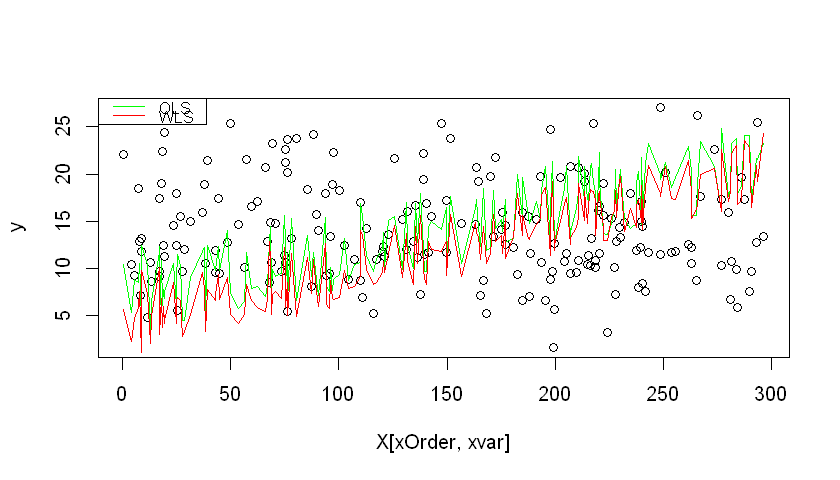

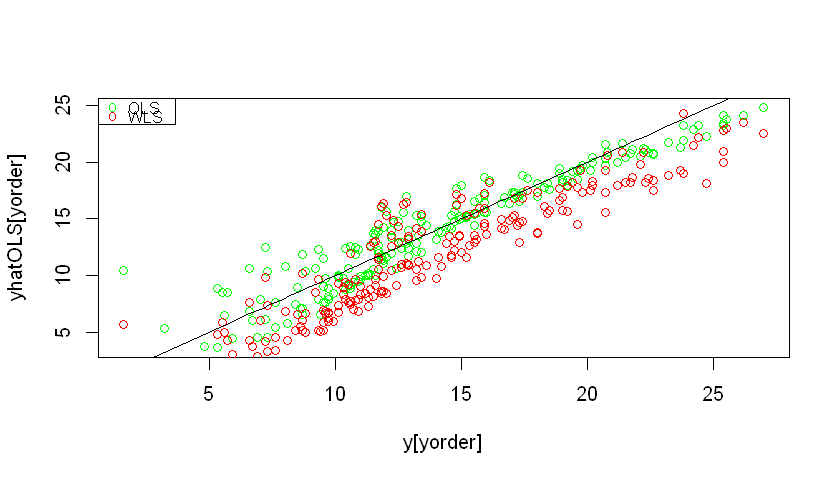

In [881]:
# This shows the y solution against one variable
# Can be changed to different variables, or change the regression above to 1D if you want a straight line
xvar = tv
xOrder = order(X[,xvar])
yhatOLS = X%*%betaOLS
yhatWLS = X%*%betaWLS
plot(X[xOrder,xvar],y)
lines(X[xOrder,xvar],yhatOLS[xOrder],col='green')
lines(X[xOrder,xvar],yhatWLS[xOrder],col='red')
legend("topleft", legend=c("OLS", "WLS"),
       col=c("green", "red"), lty=1,cex=0.8)

yorder = order(y)
plot(y[yorder],yhatOLS[yorder],col='green')
points(y[yorder],yhatWLS[yorder],col='red')
lines(y[yorder],y[yorder])
legend('topleft',legend=c("OLS","WLS"),col=c("green", "red"), pch='o',cex=0.8)


## Discussion

The weighted least squares fit using these "weights" appears to be fairly similiar to the ordinary least squares fit. (And without further information regarding the "weights" for the data set, that's about as far as we can go). 

Also note that weighting by the inverse variance, $1/\sigma_i^2$ is a reasonable approach. This implies that the less random/more well known data has a higher weighting, and will contribute more to the overall solution than data with large variances. 